<a href="https://colab.research.google.com/github/IgorWounds/Finage-Algotrading101/blob/main/Finage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import requests
import pandas as pd

API_KEY = "?apikey="
URL = "https://api.finage.co.uk/"

# US Stock Data

## Last Qoute

In [ ]:
last_qoute = requests.get(URL + 'last/stock/TSLA' + API_KEY).json()
last_qoute

{'symbol': 'TSLA',
 'ask': 272.46,
 'bid': 272.4,
 'asize': 2,
 'bsize': 1,
 'timestamp': 1662485938707}

## Last Trade

In [ ]:
last_trade = requests.get(URL + 'last/trade/stock/TSLA' + API_KEY).json()
last_trade

{'symbol': 'TSLA', 'price': 273.45, 'size': 1, 'timestamp': 1662483765986}

## Price Changes

In [ ]:
price_change = requests.get(URL + 'last/stock/changes/TSLA' + API_KEY).json()
price_change

{'s': 'TSLA',
 'lp': 272.785,
 'cpd': 0.95,
 'cpw': -1.77,
 'cpm': -68.69,
 'cpsm': -67.46,
 'cpy': -63.77,
 't': 1662483958923}

## Snapshot

In [ ]:
snapshot = requests.get(URL + 'snapshot/stock' + API_KEY).json()
#snapshot

In [ ]:
df = pd.DataFrame(snapshot['lastQuotes'])
df.head()

,s,a,b,asz,bsz,t
0,HMNF,22.75,22.61,5,1,1662483570892456
1,PFRL,49.77,49.73,1,1,1662484170005177
2,MDWT,15.20,14.75,1,1,1662484078659959
3,CAT,180.01,179.90,2,2,1662484195887232
4,ELSE,5.74,5.65,2,9,1662484080590238


# Forex

## Historical Tick Data

In [ ]:
historical_tick = requests.get(URL + 'history/ticks/forex/EURUSD/2022-09-05' + API_KEY).json()
historical_tick

{'symbol': 'EURUSD',
 'date': '2022-09-05',
 'ticks': [{'b': 0.9908, 'a': 0.9911, 't': 1662336000000},
  {'b': 0.99075, 'a': 0.99082, 't': 1662336001000},
  {'b': 0.99077, 'a': 0.99084, 't': 1662336002000},
  {'b': 0.99076, 'a': 0.99083, 't': 1662336003000},
  {'b': 0.9908, 'a': 0.99087, 't': 1662336004000},
  {'b': 0.99093, 'a': 0.991, 't': 1662336005000},
  {'b': 0.99095, 'a': 0.99102, 't': 1662336006000},
  {'b': 0.99095, 'a': 0.99102, 't': 1662336007000},
  {'b': 0.99093, 'a': 0.991, 't': 1662336008000},
  {'b': 0.9907, 'a': 0.991, 't': 1662336010000}]}

## Previous Close

In [ ]:
previous_close = requests.get(URL + 'agg/forex/prev-close/EURGBP' + API_KEY).json()
previous_close

{'symbol': 'EURGBP',
 'totalResults': 1,
 'results': [{'o': 0.86352,
   'h': 0.8655,
   'l': 0.85928,
   'c': 0.86032,
   'v': 242717,
   't': 1662422399999}]}

## Conversion

In [ ]:
usd_to_jpy = requests.get(URL + 'convert/forex/USD/JPY/1000' + API_KEY).json()
usd_to_jpy

{'from': 'USD',
 'to': 'JPY',
 'amount': 1000,
 'value': 142929,
 'timestamp': 1662486356000}

# Crypto

## Historical Market Cap Data

In [ ]:
historical_market_cap = pd.DataFrame(
    requests.get(URL + 'history/market-cap/crypto/bitcoin/2022-01-01/2022-09-05' + API_KEY).json()
    ['results']
    )

historical_market_cap.tail()

,p,mc,v,t
15,43226.6503,816800318527,14651008625,1642291200000
16,43119.7921,816325578941,14452346389,1642377600000
17,42298.3411,800822650384,17694929626,1642464000000
18,42395.4588,803962100418,18897950050,1642550400000
19,41749.5514,790507925309,19626113310,1642636800000


## Market Depth

In [ ]:
market_depth_bids = pd.DataFrame(
    requests.get(URL + 'depth/crypto/ETHUSD' + API_KEY).json()['bids'],
    columns=['bid_price', 'bid_size']
    )

market_depth_asks = pd.DataFrame(
    requests.get(URL + 'depth/crypto/ETHUSD' + API_KEY).json()['asks'],
    columns=['ask_price', 'ask_size']
    )

market_depth = market_depth_bids.join(market_depth_asks)
market_depth.tail()

,bid_price,bid_size,ask_price,ask_size
95,1580.29000000,2.12820000,1584.84000000,0.63060000
96,1580.27000000,0.11050000,1584.85000000,0.27900000
97,1580.25000000,0.03000000,1584.86000000,0.12290000
98,1580.23000000,0.31980000,1584.88000000,3.59930000
99,1580.22000000,19.85600000,1584.90000000,0.03470000


Text(0, 0.5, 'Amount')

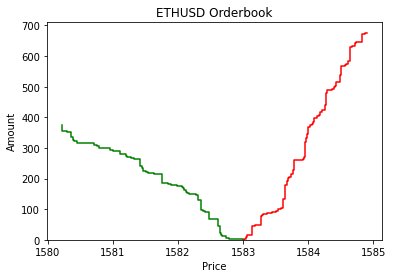

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert df columns to numeric values
market_depth = market_depth.apply(pd.to_numeric)

fig, ax = plt.subplots()
ax.set_title("ETHUSD Orderbook")

sns.ecdfplot(x="bid_price", weights="bid_size", stat="count", complementary=True, data=market_depth, ax=ax, color='g')
sns.ecdfplot(x="ask_price", weights="ask_size", stat="count", data=market_depth, ax=ax, color='r')

ax.set_xlabel("Price")
ax.set_ylabel("Amount")

# Indices

## Last Price

In [ ]:
last_price = requests.get(URL + 'last/index/NDX' + API_KEY).json()
last_price

{'symbol': 'NDX', 'price': 12044.043, 'timestamp': 1662488288057}

## Market Aggregate

In [ ]:
aggregate = pd.DataFrame(
    requests.get(URL + 'agg/index/NDX/1week/2022-01-01/2022-09-05' + API_KEY).json()
    ['results']
)

aggregate.tail()

,o,h,l,c,v,t
15,12877.04004,13326.71973,12809.00977,13207.69043,25041480000,2022-08-01T12:00:00
16,13227.08984,13565.87012,12945.59961,13565.87012,26139090000,2022-08-08T12:00:00
17,13529.66016,13720.91016,13210.82031,13242.90039,23859110000,2022-08-15T12:00:00
18,13056.38965,13175.25000,12603.41016,12605.16992,20755470000,2022-08-22T12:00:00
19,12488.45996,12594.33984,12012.98047,12098.44043,14216670000,2022-08-29T12:00:00


In [ ]:
import plotly.graph_objects as go

aggregate.set_index('t', inplace=True)

fig = go.Figure(data=[go.Candlestick(x = aggregate.index,
                                    open = aggregate['o'],
                                    high = aggregate['h'],
                                    low = aggregate['l'],
                                    close = aggregate['c']
                                    )
                      ]
                )


fig.show()

# ETFs

In [ ]:
last_price = requests.get(URL + 'last/etf/QQQ' + API_KEY).json()
last_price

{'symbol': 'QQQ', 'price': 293.66, 'timestamp': 1662489020066}

# LSE

In [ ]:
last_price = requests.get(URL + 'last/stock/uk/JET' + API_KEY).json()
last_price

{'symbol': 'JET', 'price': 1375.6, 'timestamp': 1662489337776}

# Indian Market Data

In [ ]:
last_price = requests.get(URL + 'last/stock/in/TATAPOWER' + API_KEY).json()
last_price

{'symbol': 'TATAPOWER', 'price': 247.5, 'timestamp': 1662489486775}

# Canada Market Data

In [ ]:
last_price = requests.get(URL + 'last/stock/canada/SHOP' + API_KEY).json()
last_price

{'symbol': 'SHOP', 'price': 39.81, 'timestamp': 1662489611626}

# MOEX

In [ ]:
last_price = requests.get(URL + 'last/stock/moex/AFKS' + API_KEY).json()
last_price

{'symbol': 'AFKS', 'price': 14.94, 'timestamp': 1662489725595}

# Bonds

In [ ]:
last_rate = requests.get(URL + 'bonds/us/rate/DGS1' + API_KEY).json()
last_rate

{'symbol': 'DGS1', 'value': 3.51, 'date': '2022-09-05'}

# Fundamentals

In [ ]:
btc_news = pd.DataFrame(requests.get(URL + 'news/cryptocurrency/BTC' + API_KEY).json()['news'])
btc_news

,source,title,description,url,date
0,Crypto Daily,Bitcoin Price Analysis: Bears Still Prevailing...,BTC/USD Downside Risks Prevailing: Sally Ho’s ...,https://cryptodaily.co.uk/2022/09/bitcoin-pric...,2022-09-06T18:50:06.567Z
1,Crypto Daily,The Rise of Cloud Computing as the Future of C...,One of the most important and prominent proces...,https://cryptodaily.co.uk/2022/09/the-rise-of-...,2022-09-06T18:50:06.567Z
2,CryptoSlate,Crypto whale alleged to be Saylor sent over 20...,,https://cryptoslate.com/crypto-whale-sends-ove...,2022-09-06T18:50:06.006Z
3,CryptoSlate,Research: Bitcoin exchange inflows sink to mul...,,https://cryptoslate.com/bitcoin-exchange-inflo...,2022-09-06T18:50:05.969Z
4,Cryptonews,BTC Mining Pool Poolin Suspends Wallet Withdra...,The bitcoin (BTC) mining pool Poolin’s wallet ...,/news/btc-mining-pool-poolin-suspends-wallet-w...,2022-09-06T17:23:00.000Z
5,Cryptonews,World Vision Becomes First South Korean Charit...,\The South Korean arm of the charitable organi...,/news/world-vision-becomes-first-south-korean-...,2022-09-06T17:18:00.000Z
6,INVESTORPLACE,7 Cryptos for Investors to Take Seriously in 2022,Investors looking for cryptos to buy should fo...,https://investorplace.com/2022/08/7-cryptos-to...,2022-08-30T00:00:00.000Z
7,INVESTORPLACE,COIN Stock Falls as Crypto Winter Slams Coinbase,Shares of the crypto exchange COIN stock are t...,https://investorplace.com/2022/08/coin-stock-f...,2022-08-10T00:00:00.000Z
8,The Currency Analytics,MicroStrategy Inc Believe in Bitcoin (BTC) Des...,MicroStrategy Incorporated is an American Comp...,https://thecurrencyanalytics.com/bitcoin/micro...,2022-07-19T00:00:00.000Z
9,The Currency Analytics,Long-Term BTC has Outperformed Inflation by Ma...,Inflation across the world is not a great news...,https://thecurrencyanalytics.com/bitcoin/long-...,2022-07-16T00:00:00.000Z


# WebSockets